In [1]:
import torch
import requests
from PIL import Image
import matplotlib.pyplot as plt
from transformers import AutoImageProcessor, AutoModel

/Users/peter/anaconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
preprocessor = AutoImageProcessor.from_pretrained("deepang/adaptformer-LEVIR-CD", trust_remote_code=True)
adaptfromer_model = AutoModel.from_pretrained("deepang/adaptformer-LEVIR-CD", trust_remote_code=True).eval()

In [5]:
image_A = Image.open(requests.get('https://raw.githubusercontent.com/aigzhusmart/AdaptFormer/main/figures/test_2_1_A.png', stream=True).raw)
image_B = Image.open(requests.get('https://raw.githubusercontent.com/aigzhusmart/AdaptFormer/main/figures/test_2_1_B.png', stream=True).raw)
label = Image.open(requests.get('https://raw.githubusercontent.com/aigzhusmart/AdaptFormer/main/figures/test_2_1_label.png', stream=True).raw)

In [4]:
with torch.no_grad():
    inputs = preprocessor(images=(image_A, image_B), return_tensors="pt")
    outputs = adaptfromer_model(**inputs)
    logits = outputs.logits.cpu()
    pred = logits.argmax(dim=1)[0]

Show Image

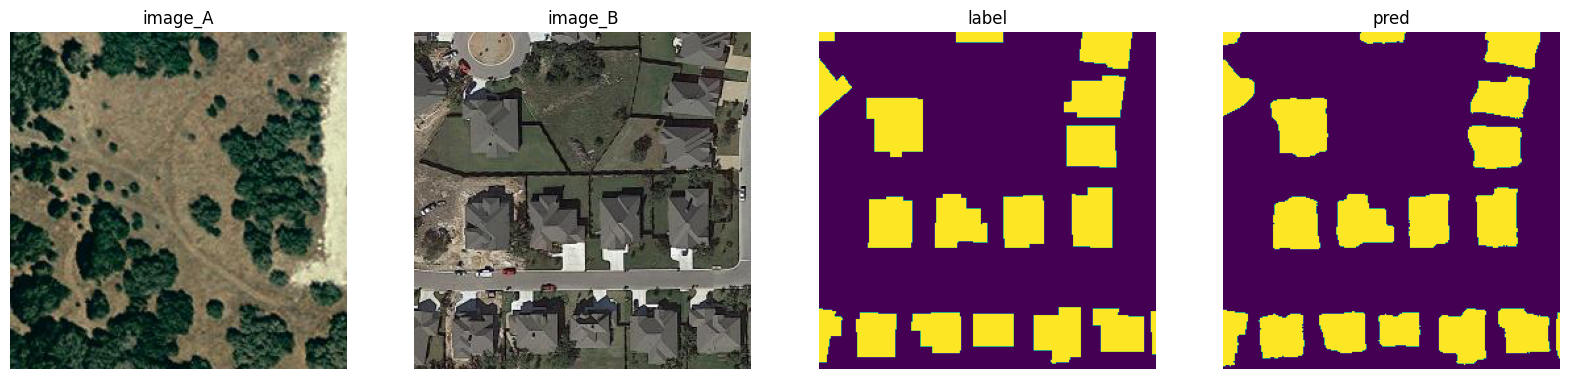

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(image_A)
axs[0].set_title('image_A')
axs[0].axis('off')

axs[1].imshow(image_B)
axs[1].set_title('image_B')
axs[1].axis('off')

axs[2].imshow(label)
axs[2].set_title('label')
axs[2].axis('off')

axs[3].imshow(pred)
axs[3].set_title('pred')
axs[3].axis('off')

plt.show()